# Neural Networks - Representations

After this lecture you should:
* understand the difference between **discrete** (one-hot) and **dense** feature representations
* know about **distributional similarity** approaches: traditional (LSA) and neural (word2vec)


### Recap: Feed-forward Neural Network


$$NN_{MLP1}(\mathbf{x})=g(\mathbf{xW^1+b^1})\mathbf{W^2}+\mathbf{b^2}$$

<div style="width: 25%;">
<img src="pics/yg-compgraph1.png">
</div>



However, what is the input $\textbf{x}$?

## Recap: Features so far


Before we go further, let's make a detour and recap: how did we represent a training instance in a traditional classifier so far?

For instance, recall our example from week 1: training a Logistic Regression classifier for sentiment classification. 

* Describe in words: what were the features we used? I.e., how did we represent a training instance $\textbf{x}$?
* How can you now describe the entire sentiment training data set as a matrix $X$, i.e.,  what are the rows and columns of $X$? $$ X = \{\mathbf{x_1}, ... , \mathbf{x_n}\} $$ 

So far we used **sparse** inputs (n-hot encodings).

# Representations

**discrete representation** (one-hot)

$$\mathbf{x}_{cat} = [0,0,0,0,0,0,1] $$
$$\mathbf{x}_{dog} = [0,0,0,0,1,0,0] $$

**similarity** on discrete representations? For any pair of words: $$\mathbf{x}_{cat} \wedge \mathbf{x}_{dog} = 0$$

Probably the biggest jump when moving from traditional linear models with sparse inputs to deep neural networks is to stop representing each feature as a unique dimension, but instead represent them as **dense vectors** (Goldberg, 2015).

Instead of using discrete representations, we will **embed** words into a high-dimensional feature space and represent each word by a lower-dimensional dense *vector* (aka. *embedding*):

$$\mathbf{x}_{cat} = [0.9, 0.1, 0.3, 0.8]$$
$$\mathbf{x}_{dog} = [0.8, 0.2, 0.7, 0.6]$$

versus one-hot:

$$\mathbf{x}_{cat} = [0,0,0,0,0,0,1] $$
$$\mathbf{x}_{dog} = [0,0,0,0,1,0,0] $$

## Representing words

**"You shall know a word by the company it keeps"** (Firth, J. R. 1957:11)

<img src="pics/contexts_degene.png">

### "The company it keeps": word co-occurence matrix

We can represent the "company" of a word in terms of a word co-occurence matrix. On the rows we have the words, on the columns their context.

**Contexts** can be of different types, for example:
* entire documents
* paragraphs
* a window around the word

#### Example corpus

In [2]:
corpus = ["She enjoys Groningen .", 
          "I like Cockatoos .", 
          "She likes good food .", 
          "I like Groningen .",
          "good times"
         ]

In [3]:
import numpy as np
vocab = set(np.concatenate([s.split() for s in corpus],0))
print(sorted(vocab))

['.', 'Cockatoos', 'Groningen', 'I', 'She', 'enjoys', 'food', 'good', 'like', 'likes', 'times']


### Co-occurence matrix

In [4]:
# let's build a co-occurence matrix 
# rows: indices of words
# columns: each column is a document, register whether the word appeared in the context
## (in practice: many more contexts, different weighting schemes etc..)
w2i = {w: i for i,w in enumerate(sorted(vocab))}
i2w = {i: w for i,w in enumerate(w2i)}

coocurrence_matrix = np.zeros((len(vocab),len(corpus)))
for col_idx, sentence in enumerate(corpus):
    sentence = sentence.split()
    for word in sentence:
        word_idx = w2i[word]
        coocurrence_matrix[(word_idx,col_idx)] +=1

print("vocab size: ", len(w2i))
print(coocurrence_matrix)

vocab size:  11
[[1. 1. 1. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0.]
 [0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [5]:
print("with row info:")
for i, row in enumerate(coocurrence_matrix):
    print("{}\t{}\t{}".format(i, i2w[i], row))

with row info:
0	.	[1. 1. 1. 1. 0.]
1	Cockatoos	[0. 1. 0. 0. 0.]
2	Groningen	[1. 0. 0. 1. 0.]
3	I	[0. 1. 0. 1. 0.]
4	She	[1. 0. 1. 0. 0.]
5	enjoys	[1. 0. 0. 0. 0.]
6	food	[0. 0. 1. 0. 0.]
7	good	[0. 0. 1. 0. 1.]
8	like	[0. 1. 0. 1. 0.]
9	likes	[0. 0. 1. 0. 0.]
10	times	[0. 0. 0. 0. 1.]


### Co-occurence matrix

* **dimensionality**: number of words $|V|$ (size of vocabulary) times number of documents (typically number of documents is huge)
* we want to **reduce** its dimensionality

### LSA - Latent Semantic Analysis (Singular Value Decomposition - SVD)

Approximate a matrix $\mathbf{C}$ through a decomposition into three submatrices (**of smaller dimensionality**):

$$\mathbf{C} \approx \mathbf{U \sum V^T}$$

<img src="https://simonpaarlberg.com/posts/2012-06-28-latent-semantic-analyses/box2.png">

NB. $=$ should be $\approx$

In [8]:
from sklearn.utils.extmath import randomized_svd

# reduce space to, say, 2 dimensions (for simplicity here)
U, Sigma, VT = randomized_svd(coocurrence_matrix, n_components=2)
print(U.shape, Sigma.shape, VT.shape)

(11, 2) (2,) (2, 5)


#### Visualizing the vector space

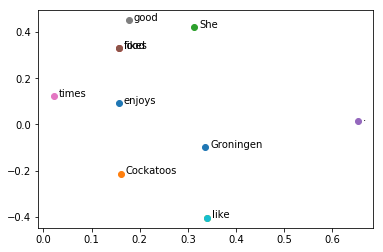

size of U: (11, 2)
vector for 'likes': [0.15663919 0.32849558]


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
#print(vocab)
for word in vocab:
    i=w2i[word]
    plt.text(U[i,0]+0.01,U[i,1], word)
    plt.plot(U[i,0],U[i,1], 'o')
plt.show()
print("size of U:", U.shape)
print("vector for 'likes':", U[w2i["likes"]])
#for w in vocab:
#    print("vector for '{}': {}".format(w, U[w2i[w]]))

### Similarity

**cosine** similarity 

<img src="https://simonpaarlberg.com/posts/2012-06-28-latent-semantic-analyses/eq1.png">
<div style="width: 25%;">
<img src="https://simonpaarlberg.com/posts/2012-06-28-latent-semantic-analyses/vector_example2.png">
</div>


**Exercise**: Calculate the cosine distance between the words *good* and *enjoys* as well as *enjoys* and *likes*. (Hint: you can use the *cosine* **distance** function from *scipy.spatial.distance*, notice it is 1 minus cosine similarity). What is the distance between a word and itself? Solution in the notebook.

In [13]:
## solution:
from scipy.spatial.distance import cosine

v_likes = U[w2i["likes"]]
v_enjoys = U[w2i["enjoys"]]
v_good = U[w2i["good"]]

print("cosine distances:")
print("good<>enjoys:     {0:.2f}".format(cosine(v_good, v_enjoys)))
print("enjoys<>likes: {0:.2f}".format(cosine(v_enjoys, v_likes)))
print("good<>good: {0:.2f}".format(cosine(v_good, v_good)))



cosine distances:
good<>enjoys:     0.21
enjoys<>likes: 0.17
good<>good: 0.00


## Deep learning approach: Directly learning word vectors (embeddings)

* SVD: computation cost scales quadratically with size of co-occurence matrix; difficult to integrate new words
* **Idea**: directly learn word vectors (e.g. word2vec)
    * NLP (almost) from Scratch (Collobert & Weston, 2008)
    * word2vec (Mikolov et al, 2013)

### Main idea of word2vec

* instead of capturing co-occurence statistics of words
* **predict context** (surrounding words of every word); in particular, predict words in a window of length $m$ around the current word

Maximize the probability of a word in the context ($o$) given the current word $c$:

$$p(o|c) = \frac{exp(u_o^T v_c)}{\sum_{w=1}^W exp(u_w^T v_c)}$$

<div style="width: 50%;">
<img src="http://www.gabormelli.com/RKB/images/a/a6/skip-gram_NNLM_architecture.150216.jpg">
</div>

<div style="width: 50%;">
<img src="http://www.gabormelli.com/RKB/images/a/a6/skip-gram_NNLM_architecture.150216.jpg">
</div>

At the end you can read off the embedding vector from the Embedding (projection) layer.

NB. denominator $\sum$ over all words! In practice, *negative sampling* is used (randomly choose a word which is not in context as a negative sample).

Exercise. Check out CBOW, the other algorithm in word2vec.

In deep learning we represent words as vectors.

**a) sparse representation vs b) dense representation**  (Figure 1 in Yoav Goldberg's primer)
<div style="width: 50%;">
<img src="pics/sparsevsdense.png">
</div>

#### Traditional vs deep learning approach to feature extraction (representations)

The common pipeline of extracting features **for an NLP model with a Neural Network** then becomes:

* extract a set of core linguistic features $f_1,..f_n$
* define a **vector** for **each feature** (lookup Embedding table)
* **combine** vectors of features to get the vector representation for the **instance** $\mathbf{x}$ (**dense representation**)
* use $\mathbf{x}$ as representation for an instance, train the model


    

Lets compare this to our traditional approach - the common pipeline of extracting features for an NLP model is:

* extract a set of core linguistic features $f_1,..f_n$
* define a vector whose length is the total number of features with a 1 at position k if the k-th feature is active; this feature vector represents the **instance** $\mathbf{x}$  (**sparse representation**, n-hot encoding)
* use $\mathbf{x}$ as representation for an instance, train the model

Now it should be clear why it is called sparse vs dense feature representation.


### How do you combine different feature vector representations?


In an NLP application, $\mathbf{x}$ is usually composed of various embedding vectors.


Following the notation in Goldberg (2015), chapter 4, let's use the function $c(\cdot)$ as **feature combiner** that creates our input embeddings layer.

A common choice for $c$ is **concatenation**:

$\mathbf{x} = c(f_1, f_2, f_3) = [v(f_1); v(f_2); v(f_3)]$

Alternatively, $c$ could be the **sum of the embedding vectors**:

$\mathbf{x} = c(f_1, f_2, f3) = [v(f_1)+v(f_2)+v(f_3)] $

or its **mean**:

$\mathbf{x} = c(f_1, f_2, f3) = [mean(v(f_1),v(f_2),v(f_3))] $

In many papers $v$ is often referred to as the embeddings layer or lookup layer.

#### Our example from before with explicit input representation

For instance, let us explicitly state the input representation. Suppose we use the concatentation operator, then our network above becomes:

<img src="pics/nn.png" width=300> 

since: 
$\mathbf{x} = c(f_1, f_2, f_3) = [v(f_1); v(f_2); v(f_3)] $

then: 

$NN_{MLP1}(\mathbf{x})=g(\mathbf{[v(f_1); v(f_2); v(f_3)]W^1+b^1})\mathbf{W^2}+\mathbf{b^2}$



<div style="width: 20%;"><img src="pics/nn.png"></div>

As a computational graph:
<div style="width: 20%;"><img src="pics/yg-compgraph2.png"></div>
Note, as in the previous notebook, that the dimensions in the computational graph do not correspond to those in the network depicted above

The values of the *embedding vectors* are treated as model parameters and trained together with the other parameters of the model (weights).

Unrolled graph with concrete input, expected output, and loss node, (Goldberg Figure 3c):
<div style="width: 20%;"><img src="pics/yg-compgraph3.png"></div>

### Example: animacy classification

Exercise: 

* add an embedding layer to the animacy classification example. For now use a simple concatenation as representation. What performance do you get?

* add code that reads off the embedding layer from the network and stores it in a file "vectors.txt". Once you have this embedding vector you can inspect it (e.g. find nearest neighbors) as shown below.

In [72]:
# once we have read off the embeddings after training the animacy classifier, and 
# stored them in file 'vectors.txt' we load it for inspection
from gensim.models.keyedvectors import KeyedVectors
w2v = KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)
w2v.most_similar(positive=['Texas'])


[('Florida', 0.9196957945823669),
 ('Arlington', 0.9070820808410645),
 ('California', 0.8937997817993164),
 ('Buffalo', 0.8546850085258484),
 ('Canada', 0.8518165349960327),
 ('Japan', 0.8483419418334961),
 ('Europe', 0.8347345590591431),
 ('Houston', 0.8322141170501709),
 ('Virginia', 0.8314700126647949),
 ('France', 0.8283012509346008)]

In [73]:
w2v.most_similar(positive=['send'])


[('elect', 0.851630449295044),
 ('word', 0.8355662822723389),
 ('letting', 0.8245967030525208),
 ('teach', 0.8199971914291382),
 ('swaying', 0.81275475025177),
 ('parks', 0.811647891998291),
 ('finally', 0.7990972995758057),
 ('wishes', 0.793840765953064),
 ('repainted', 0.7927937507629395),
 ('jus-', 0.787428617477417)]

These vectors are not traditional word vectors learned with word2vec (i.e. skip-gram or CBOW model). Instead we read them off from our animacy classifier (they are not trained with the word2vec objective, but are a by-product of the classifier). Nevertheless this shows us that we can also get embeddings from a neural network with dense (embedding) inputs!

### Word Embeddings

So, in deep learning approaches to NLP words are represented as dense vectors. Where do these word vectors (embeddings) come from?

* **off-the-shelf embeddings**: you can also use trained, available embeddings (estimated with e.g. *word2vec*, *GLoVe* or *FastText*) and *initialize* the embedding layer of the network with your pretrained (unsupervised) word embeddings
* **task-specific embeddings**: you could also train your embeddings from scratch with the data for your task. In this case, the vectors are typically **randomly initialized** (small numbers around 0) and *trained with the network*. At the end you can read them off the network.

Remember, today we have seen three ways to get embeddings:

1. Traditional methods (also called 'count' methods): SVD on a co-occurence matrix (=LSA)
2. Neural method #1 (also called 'predict' methods): e.g. word2vec (train on a large unlabeled corpus)
3. Neural method #2 (also a 'predict' method, but task-specific): train your embeddings on your supervised task, read them off at the end (typically less used as you will have less supervised training data, it's easier to get loads of unlabeled text)

### Inputs of different lengths

In our animacy classification example we have made one simplification: the input is always of the same size (namely, 5 words). Were there inputs of less than 5 words?

However, in NLP we seldom have fixed size inputs; sentences are of different length. The neural network however needs inputs of fixed size. So how to deal with this?



* create an input of fixed size, e.g. using the mean embedding vector
* use a model that can deal with variable size inputs, e.g. a recurrent neural network (depending on the deep learning toolkit you use, you might still need to *pad* sequences to a fixed length)


### References

* Yoav Goldberg's primer (chapters 2 and 5): [A Primer on Neural Network Models for Natural Language Processing](http://arxiv.org/abs/1510.00726)
* D. Rao & B. McMahan's NLP with PyTorch (chapter 5).
* Simon Paarlberg's [blog on LSA](https://simonpaarlberg.com/post/latent-semantic-analyses/)
* Richard Socher's [lecture on word vectors](https://www.youtube.com/watch?v=xhHOL3TNyJs)